In [2]:


import numpy as np
import numpy.linalg as npl
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint

ModuleNotFoundError: No module named 'scipy'

**Worked Example**
Read Calculus in Context, Chapter 4. This explores additional models that can be explored using this method. 
Copy and paste SIR plot here and  modify to model the Lotka-Voerra Model from page 193 number 7. Explore some of the questions a - f on your own and add some short notes about this model. note: The scaling factor for lynx is 60 (page 194, part c)."plot H and 60L"




Text(0.5, 1.0, 'Hare and Lynx Populations')

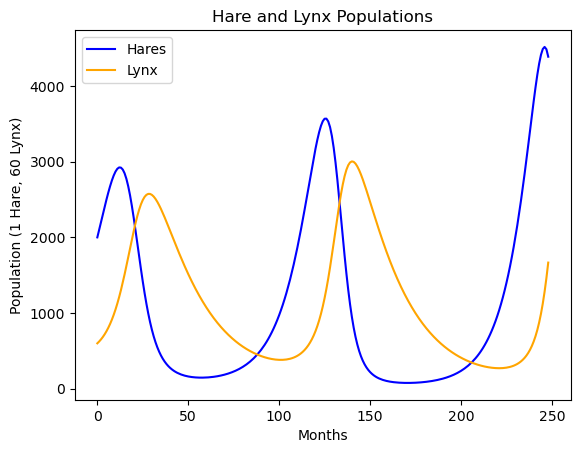

In [16]:
def lynxHare(num_hare, num_lynx, t_final):
    # time variables
    t_initial = 0
    t = t_initial
    # Starting values at the beginning of model for hares and lynx (turns out the plural of lynx is just lynx)
    H = num_hare
    L = num_lynx

    # Hares per month per hare
    a = .1
    # Hares per month per hare-lynx
    b = .005
    # Lynx per month per hare-lynx
    c = .00004
    # Lynx per month per lynx
    d = .04

    # Creating empty arrays to hold values we will plot
    H_graph = []
    L_graph = []

    # Change in time/number of steps
    delta_t = 1
    # Iterating through the number of line segments in our plot (the more lines, the smoother the graph)
    for k in range (1, t_final):
        # Add current values to graph vectors (include Lynx scaling factor of 60)
        H_graph.append(H)
        L_graph.append(60*L)
        # Rate of change in Hare population
        Hprime = a*H - b*H*L
        # Rate of change in Lynx population
        Lprime = c*H*L - d*L
        
        # Actual change in Hare and Lynx populations
        delta_H = Hprime*delta_t
        delta_L = Lprime*delta_t

        #Updating the values of t, H, and L with our delta values
        t = t + delta_t
        H = H + delta_H
        L = L + delta_L

    # return the arrays with values over each step
    return H_graph, L_graph


# Plot the populations
H_line, L_line= lynxHare(2000, 10, 250)
plt.plot(H_line, color='blue', label='Hares')
plt.plot(L_line, color='orange', label='Lynx')
plt.legend(['Hares', 'Lynx'])
plt.xlabel('Months')
plt.ylabel('Population (1 Hare, 60 Lynx)')
plt.title('Hare and Lynx Populations')    

The graph above shows part C of number 7 on p. 193-194 of Calculus in Context, beginning with 2,000 hares and 10 lynx.  It includes the basic assumptions of the two species model:

* In the absence of lynx, the hare population grows logistically - we see this in the equation for Hprime, where if the lynx population is 0 then the hare population is aH 
* The population of hares declines in proportion to to H*L - see this in the second half of the equation for Hprime, -bHL.  Both of these assumptions can be seen in the rise and fall of the blue line, which represents the hare population
* In the absence of hares, the lynx die of proportional to the number of lynx - the equation for Lprime shows that if H is 0, then the lynx decline at a rate of dL (and is demonstrated by the declines in the orange line, which occur following the decline of the blue line representing hares)
* The lynx population increases proportionately to the number of encounters between lynx and hares - this can be seen in the first half of Lprime, cHL where c represents lynx per month per hare-lynx.

The hare-lynx units are especially interesting, as they complicate the model to include not only the populations of predators and prey, but also the encounters between the two (R.I.P. hares).

Below are the graphs for parts D and F of number 7, showing both the hare and lynx populations when L=20 and L=50.  Doubling the lynx population from our initial graph condensed it, but changing it 50 did the opposite, spreading out the population peaks and valleys further over the 250 months.

Text(0.5, 1.0, 'Lynx pop. = 20')

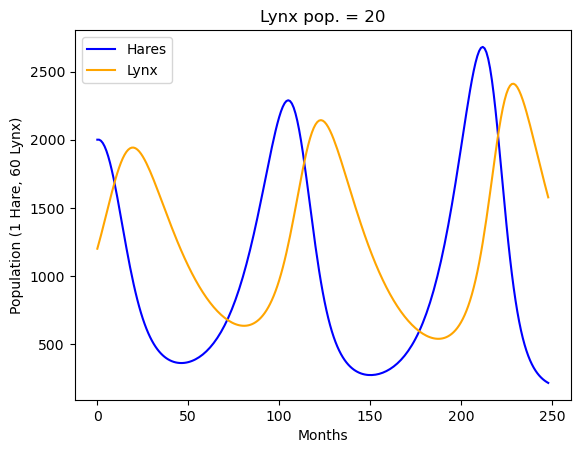

In [17]:
H_line, L_line= lynxHare(2000, 20, 250)
plt.plot(H_line, color='blue', label='Hares')
plt.plot(L_line, color='orange', label='Lynx')
plt.legend(['Hares', 'Lynx'])
plt.xlabel('Months')
plt.ylabel('Population (1 Hare, 60 Lynx)')
plt.title('Lynx pop. = 20') 

Text(0.5, 1.0, 'Lynx pop = 50')

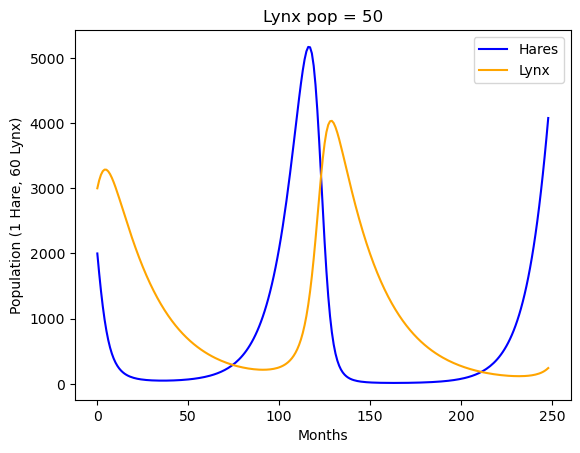

In [18]:
H_line, L_line= lynxHare(2000, 50, 250)
plt.plot(H_line, color='blue', label='Hares')
plt.plot(L_line, color='orange', label='Lynx')
plt.legend(['Hares', 'Lynx'])
plt.xlabel('Months')
plt.ylabel('Population (1 Hare, 60 Lynx)')
plt.title('Lynx pop = 50') 

**Activity One:**
Do all parts of the May Model, 4.1 question 6. 


Enter the saturation value:  1000
Enter a value for d:  5


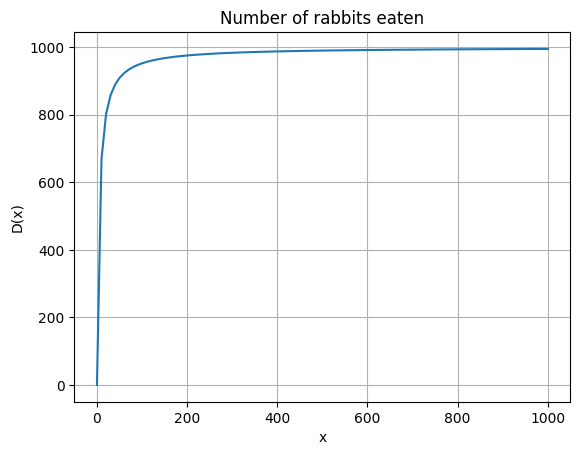

In [40]:
##crediting Nandini Bhat for the code below.

import numpy as np
from matplotlib import pyplot as plt
def function(c, d, x):
    
    return (c * x) / (x + d)

def Derivative_Graph():
    
    c = int(input("Enter the saturation value: "))
    d = int(input("Enter a value for d: "))
      
    x_vals = np.linspace(0, 1000, 100) #keep in mind these are hectorabbits- 100 = 10000, 1000 = 100000
    y_vals = function(c, d, x_vals)
    
    plt.plot(x_vals, y_vals)
    plt.title("Number of rabbits eaten")
    plt.xlabel("x")
    plt.ylabel("D(x)")
    plt.grid(True)
    plt.show()

Derivative_Graph()

Enter the saturation value:  1000
Enter a value for d:  20


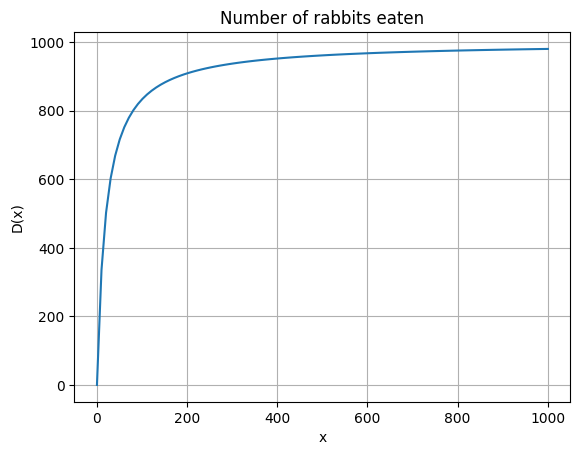

In [41]:
Derivative_Graph()

Enter the saturation value:  1000
Enter a value for d:  50


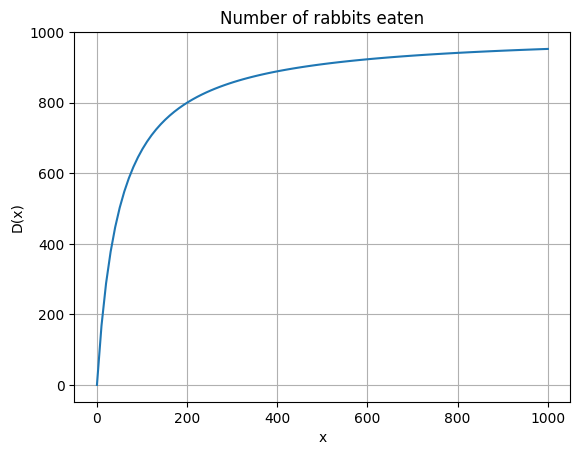

In [42]:
Derivative_Graph()

Enter the saturation value:  1000
Enter a value for d:  500


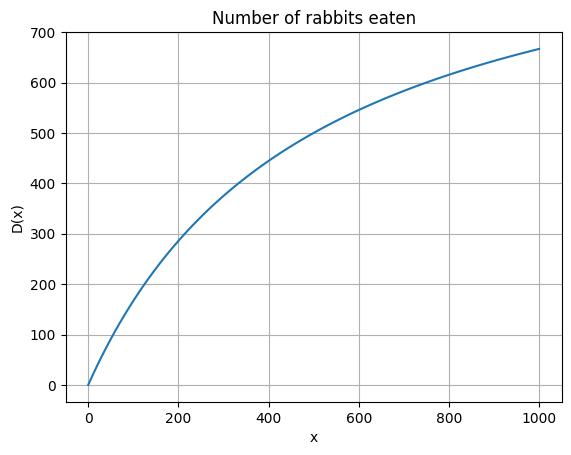

In [43]:
Derivative_Graph()

a. The role of the variable d appears to control how quickly the rabbits are eaten.  As d gets larger in the series of graphs above, the rabbits are consumed at a slower rate.  When d is small, the rate of consumption is rapid as evident by the steep curve in the first graph above. In summary, d appears to be the rate of consumption. <br>
b. In this system of equations, x_prime represents the rate of change for the rabbit population and y_prime represents the rate of change for the fox population.  D(x) models the consumption of the rabbit population, but we must account for the changes in the fox population as well in order to accurately account for how many rabbits are consumed.  

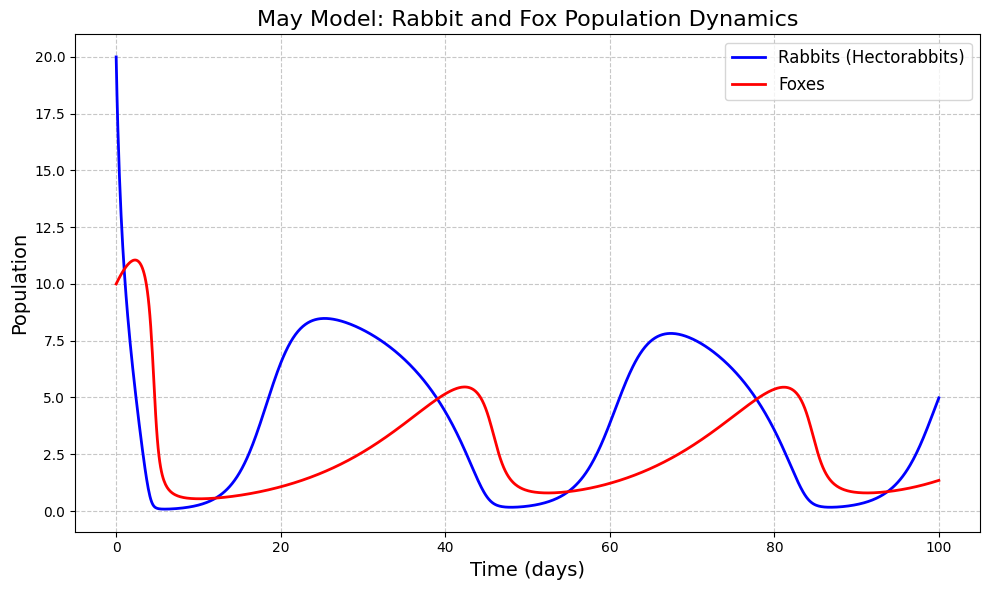

In [47]:
#c. SIRPLOT modification - Mays Model. Code credit: Liam Keyek.
def MayModel(Tinit, Tfinal, R, F, a, b, c, d, e, f, steps):
    # Time step
    dT = (Tfinal - Tinit) / steps
    Tvals = [Tinit]
    Rvals = [R]
    Fvals = [F]
    
    # Loop over the number of steps
    for k in range(1, steps + 1):
        # Compute rate of change of rabbits and foxes
        Rp = a * R * (1 - R / b) - c * R * F / (R + d)
        Fp = e * F * (1 - F / (f * R))
        
        # Update rabbit and fox populations
        dR = Rp * dT
        dF = Fp * dT
        
        # Advance time and update populations
        Tinit += dT
        R += dR
        F += dF
        
        Tvals.append(Tinit)
        Rvals.append(R)
        Fvals.append(F)
    
    plt.figure(figsize=(10, 6))
    plt.plot(Tvals, Rvals, label="Rabbits (Hectorabbits)", color='b', lw=2)
    plt.plot(Tvals, Fvals, label="Foxes", color='r', lw=2)
    
    plt.xlabel("Time (days)", fontsize=14)
    plt.ylabel("Population", fontsize=14)
    plt.title("May Model: Rabbit and Fox Population Dynamics", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
#Running model with initla values given in book. 2000/10 to get hectorabbits.
MayModel(0, 100, 20, 10, 0.6, 10, 0.5, 1, 0.1, 2, 1000)

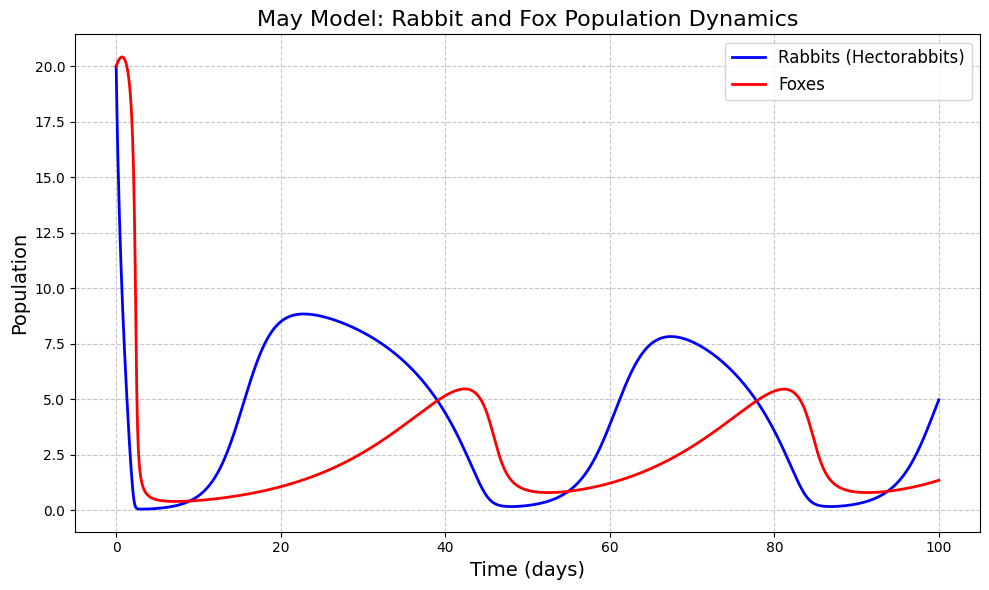

In [52]:
MayModel(0, 100, 20, 20, 0.6, 10, 0.5, 1, 0.1, 2, 1000)

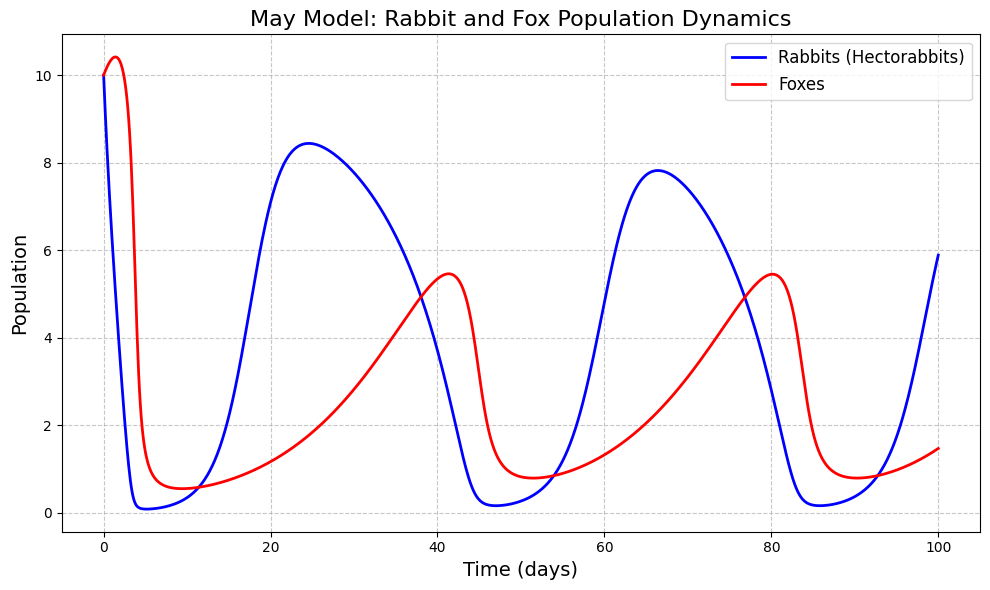

In [50]:
MayModel(0, 100, 10, 10, 0.6, 10, 0.5, 1, 0.1, 2, 1000)

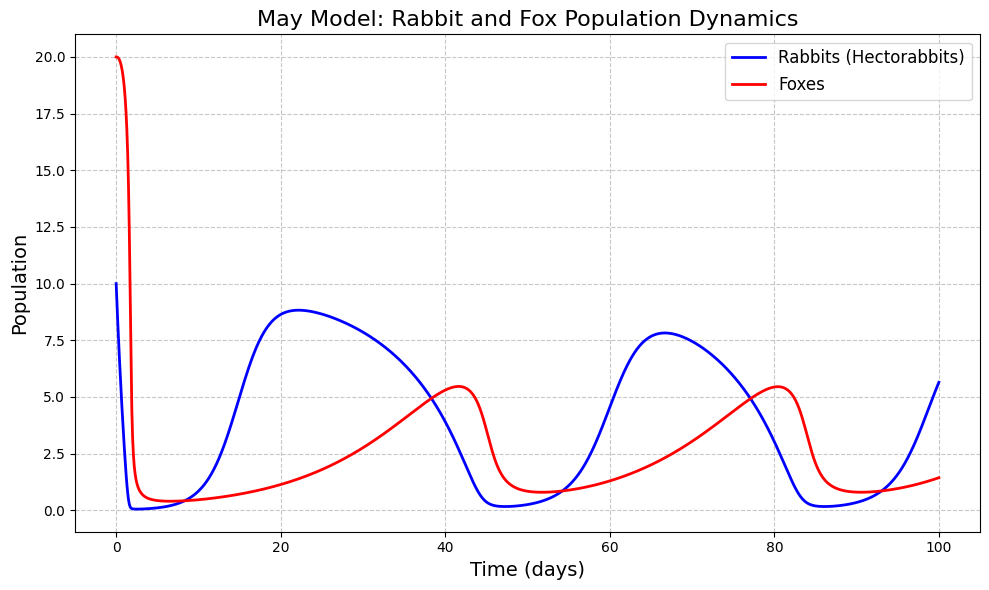

In [51]:
MayModel(0, 100, 10, 20, 0.6, 10, 0.5, 1, 0.1, 2, 1000)

d. Above are the graphs for each scenario outlined in the text, with varied initial values for the rabbit and fox population.  Long term, it appears that we see the same trends in the rise and fall of each population regardless of the initial conditions. This is a similar result to the Lotka-Volterra models that are in the first section of this notebook.  There are some differences in the start and end values for the populations, but they seem to rise and fall at a similar cadence regardless of the initial conditions.

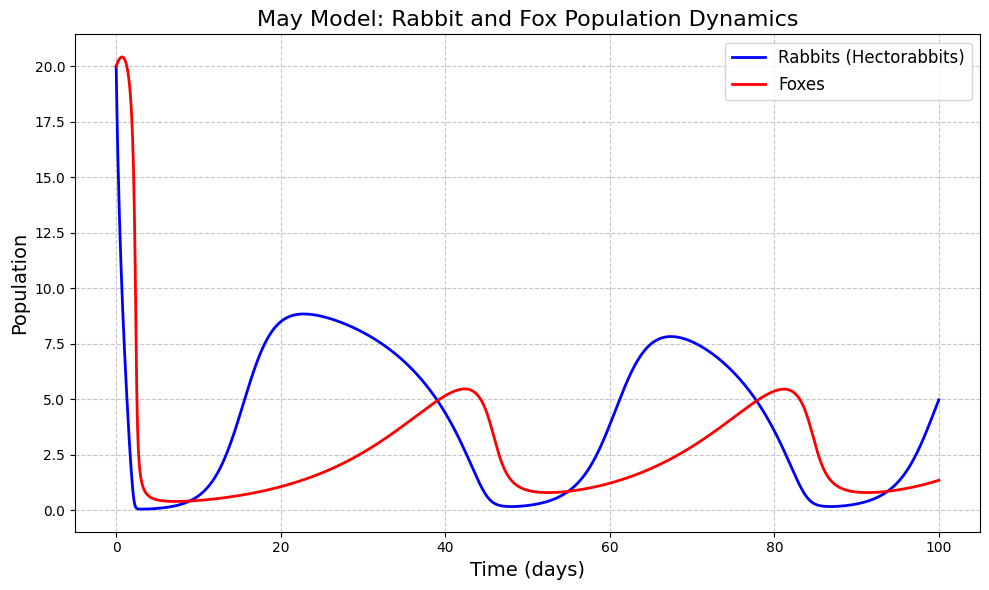

In [53]:
#e. begin
MayModel(0, 100, 20, 20, 0.6, 10, 0.5, 1, 0.1, 2, 1000)

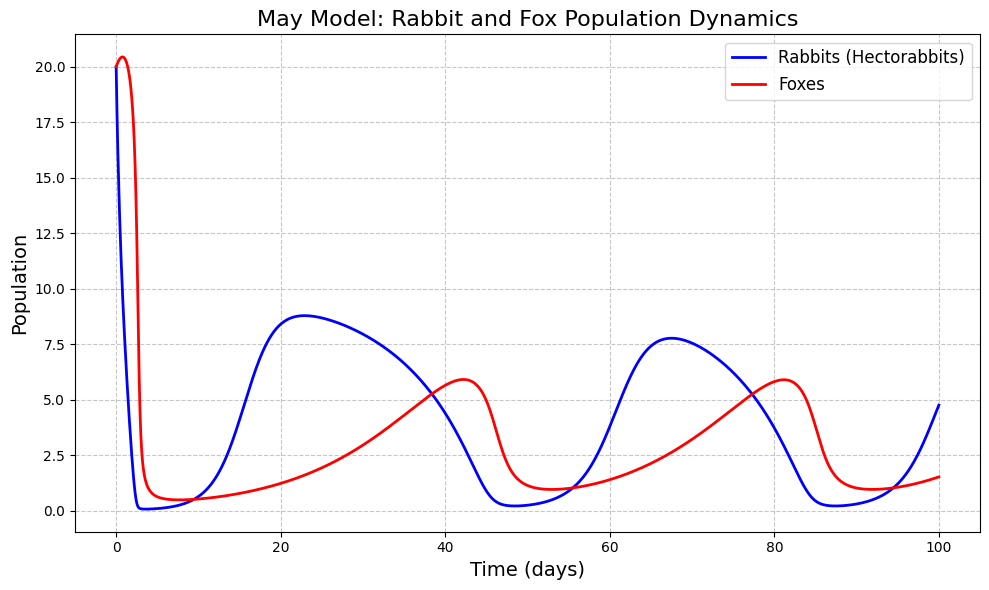

In [54]:
MayModel(0, 100, 20, 20, 0.6, 10, 0.45, 1, 0.1, 2, 1000)

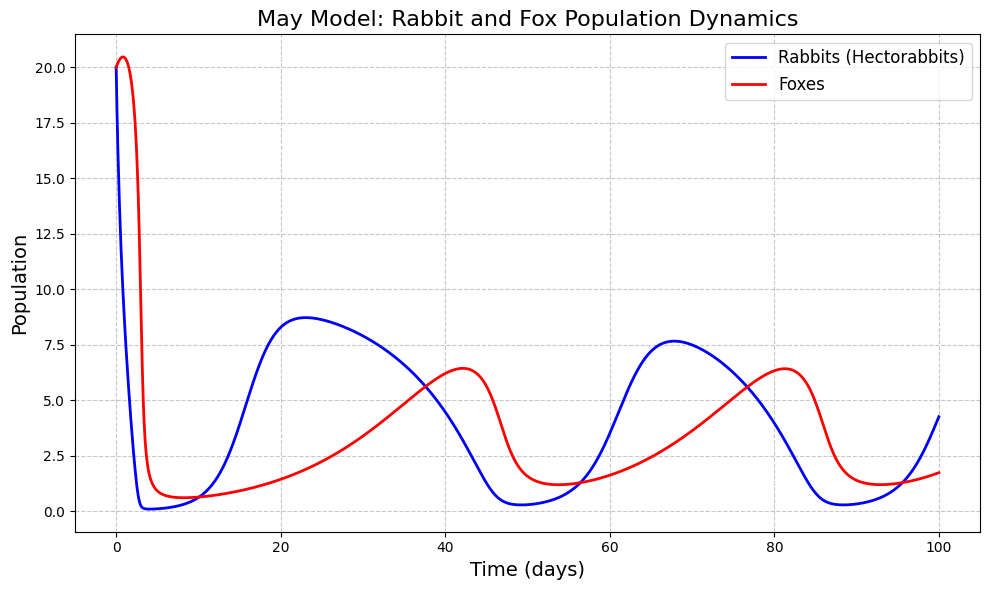

In [55]:
MayModel(0, 100, 20, 20, 0.6, 10, 0.4, 1, 0.1, 2, 1000)

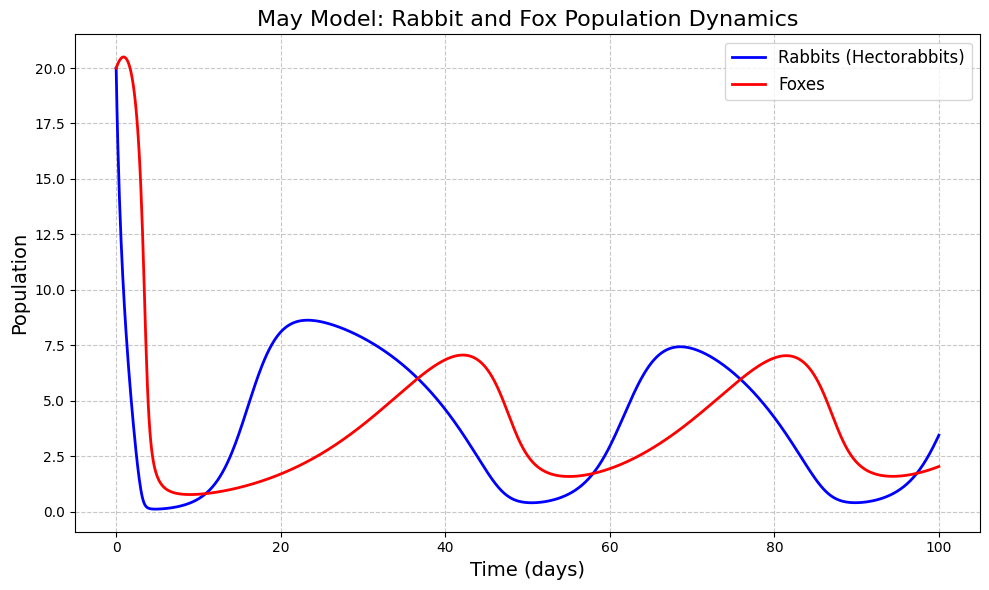

In [56]:
MayModel(0, 100, 20, 20, 0.6, 10, 0.35, 1, 0.1, 2, 1000)

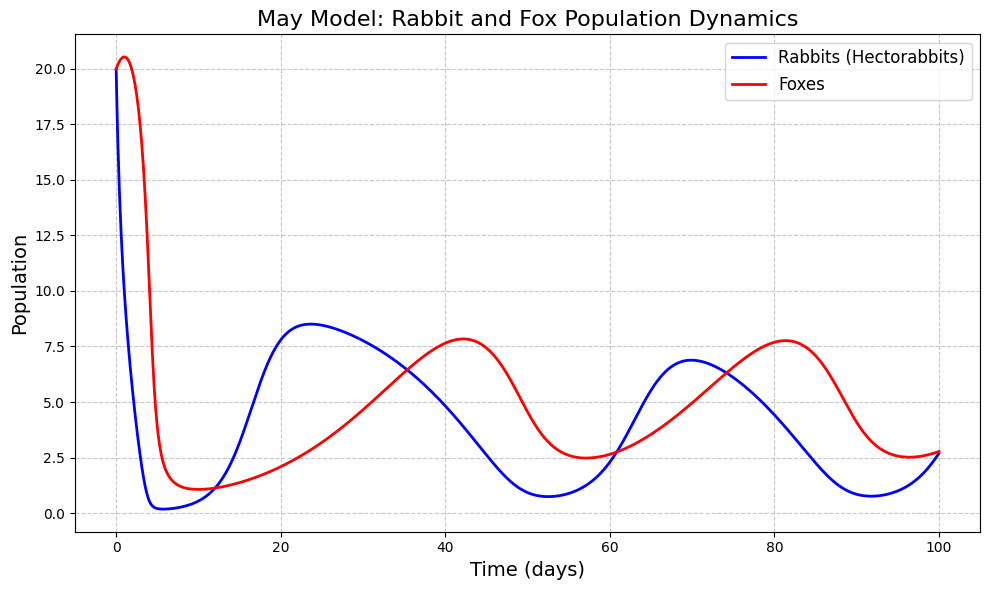

In [57]:
MayModel(0, 100, 20, 20, 0.6, 10, 0.3, 1, 0.1, 2, 1000)

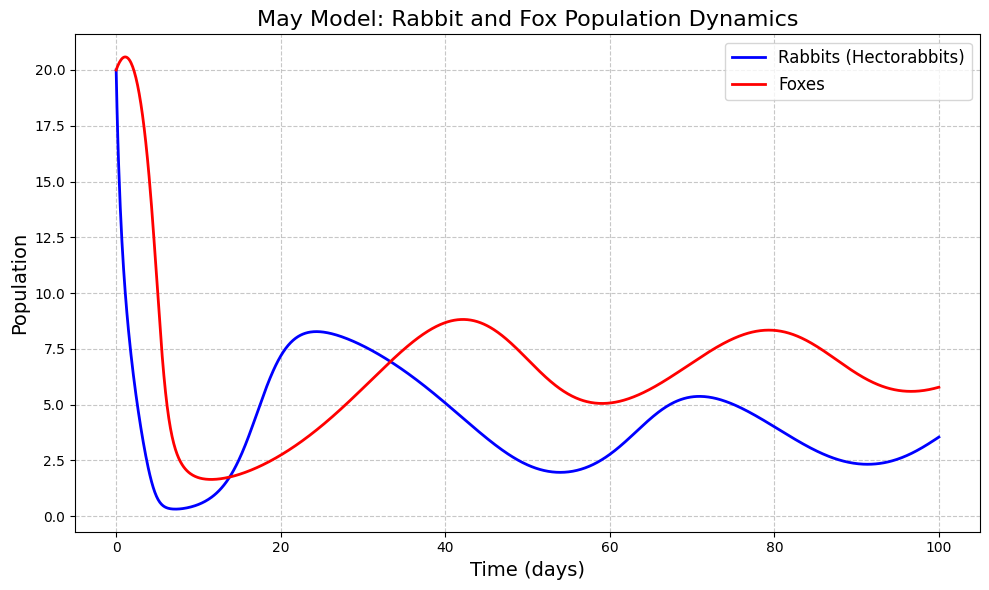

In [58]:
MayModel(0, 100, 20, 20, 0.6, 10, 0.25, 1, 0.1, 2, 1000)

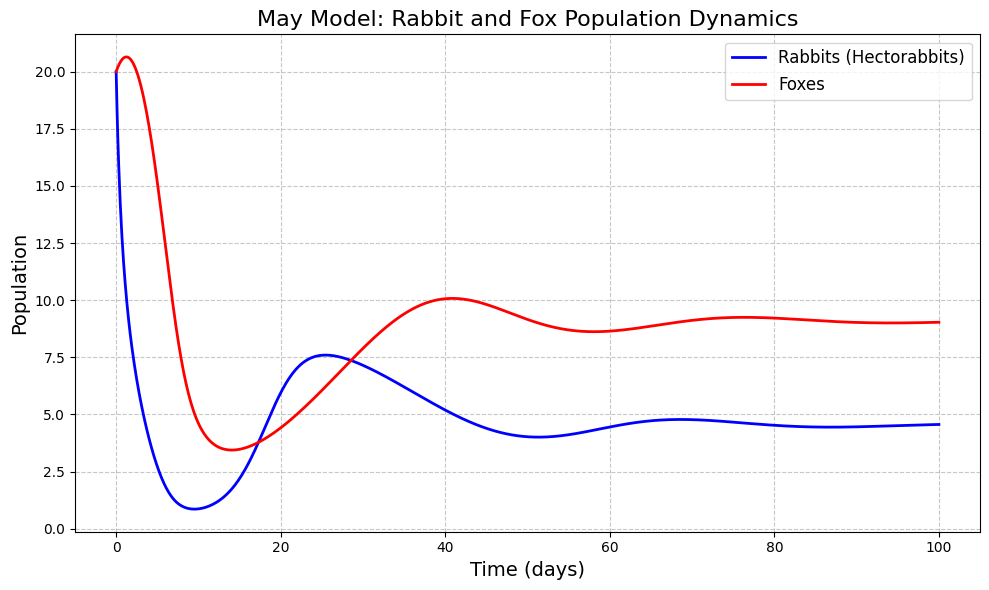

In [59]:
MayModel(0, 100, 20, 20, 0.6, 10, 0.2, 1, 0.1, 2, 1000)

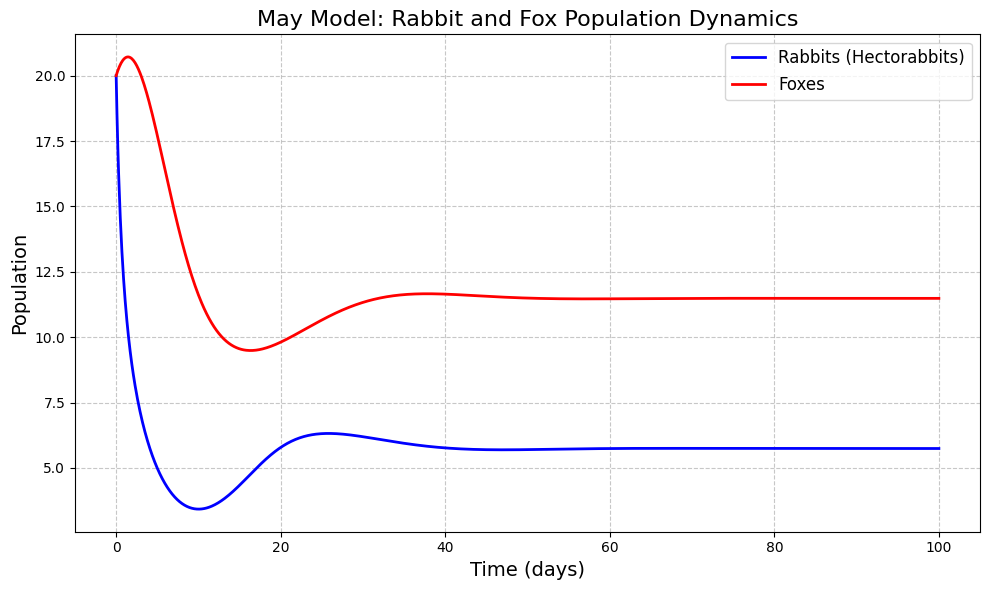

In [60]:
MayModel(0, 100, 20, 20, 0.6, 10, 0.15, 1, 0.1, 2, 1000)

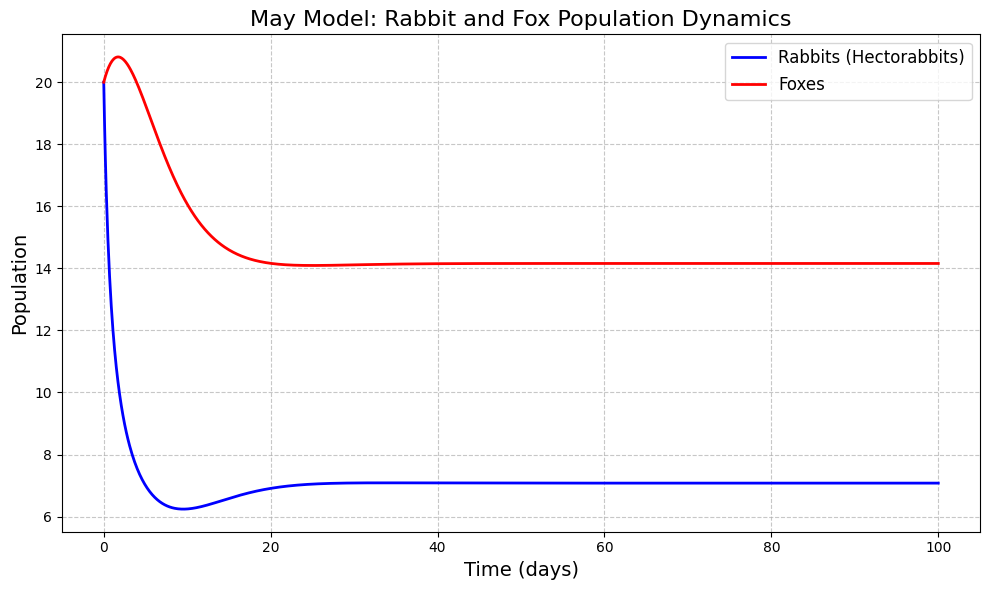

In [61]:
MayModel(0, 100, 20, 20, 0.6, 10, 0.1, 1, 0.1, 2, 1000)

**Activity Two:**
Do all parts of 4.1  #8, #9, #10, #11 Fermentation. It's great to discover these equations on your own,however, please check with me and Piazza to make sure you've got them right.

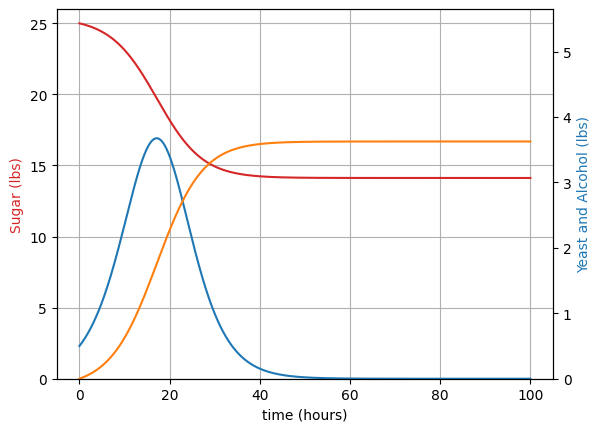

In [29]:
##Fermentation model with a start of 0.5 lbs. yeast at a growth rate of 0.1lb/hr.
###It takes about 23 hours (blue plot) to reach half capacity and 40 hours (orange plot) to reach full capacity.
def Fermentation(yeast_start, sugar_start, time):
    #Initializations
    t_initial, t_final = 0, time #start and end number of hours
    t = t_initial #current hour
    Y = yeast_start #initial yeast weight.
    S = sugar_start #initial sugar weight.
    A = 0 #initial alcohol weight.
    num_steps = t_final * 10  #10 steps for each hour.
    g = 0.2 #growth rate of yeast
    a = 0.05 #growth rate of alcohol
    k = 0.1 #loss rate of yeast
    s = 0.15 #loss rate of sugar
    delta_t = (t_final - t_initial) / num_steps #time delta.

    #initialize lists for x and y axis to plot for yeast growth.
    x_axis = [t]
    y_y_axis = [Y] #array for yeast y coords.
    a_y_axis = [A] #array for alcohol y coords.
    s_y_axis = [S] #array for sugar y coords.
    

    #loop through yeast growth for specified number of hours * 10.
    for i in range(num_steps):
  
        #calculate rate of growth/loss for yeast, alcohol and sugar.
        y_prime = (g * Y) - ((g / (0.4 * S)) * Y) - (k * Y * A) 
        a_prime = a * Y 
        s_prime = -s * Y

        #calculate delta for yeast, alcohol, sugar growth/loss.
        delta_y = y_prime * delta_t
        delta_a = a_prime * delta_t
        delta_s = s_prime * delta_t

        #append deltas to x_axis(months) and y_axis for yeast, alcohol, sugar growth/loss.
        x_axis.append(t + delta_t)
        y_y_axis.append(Y + delta_y)
        a_y_axis.append(A + delta_a)
        s_y_axis.append(S + delta_s)


        #set new initial values for next iteration.
        Y = Y + delta_y
        A = A + delta_a
        S = S + delta_s
        t = t + delta_t
        
        #stop fermentation after yeast is 0.01 lbs (will never be 0).
        if Y <= 0.0000001 :
            break

    fig, ax1 = plt.subplots()
    
    #plot sugar on a 25 lb. scale.
    color = 'tab:red'
    ax1.set_xlabel('time (hours)')
    ax1.set_ylabel('Sugar (lbs)', color = color)
    ax1.set_ylim(0, sugar_start + 1)
    ax1.plot(x_axis, s_y_axis, color = color)
    ax1.grid()
    
    ax2 = ax1.twinx()
    #plot yeast and alcohol on a .4*S scale. 
    color = 'tab:blue'
    ax2.set_ylabel('Yeast and Alcohol (lbs)', color = color)
    #set y axis limit to .4*S
    ax2.set_ylim([0, .4 * S])
    ax2.plot(x_axis, y_y_axis, color = color)
    ax2.plot(x_axis, a_y_axis, color = 'tab:orange')
    
    return
#run fermentation model with .5 lbs. of yeast, 25 lbs. of sugar over 20 hours.
Fermentation(.5, 25, 100)

**Notes:**
I wanted to address some of the questions regarding the results of the model after implementing the steps in problems 8, 9, 10, & 11.  The final model after modifying all of the equations is below.  The graph below represents the results of running the model with .5 lbs. of yeast, 25 lbs of sugar over a time period of 20 hours. 
1. All of the sugar does not disappear.  As the yeast is slowly killed by alcohol production, less sugar is consumed.  When the yeast value gets low enough, sugar consumption essentially comes to a halt.  The implementation below does have a break point of 0.01 lbs. yeast, since the yeast will never fall to 0. 
2. All of the yeast does not disappear. If you comment out the break for the for loop when Y <= 0.01 and increase the time to say 100 hours, the Y value will continue to decrease but does not fall to 0.  This can be observed by printing the y_y_axis.
3. It takes about 17.5 hours for the yeast to reach 0.01 lbs. This is where the for loop stops and the line for Y ends at 17.5 hours in the graph below. 
4. When the yeast value drops to or below 0.01 lbs, the sugar content is a little under 5 lbs. 
5. When the yeast value drops to or below 0.01 lbs, the alcohol content is about 0.6 lbs.

**Activity Three:**
Choose any of the models from the book to expand upon and develop. This does not have to be super complex, please scale it to the time you have available.
+ The simple Lotka-Volterra model from #7 is easy to expand to a complex ecosystem with MANY equations (mice, foxes, bears, aliens, and can accomodate a Zombie Apocolypse)
+ Expand SIR, add complexities with immunity, other diseases (try Chicken Pox and Shingles together),add deaths, more variables, or compare various epidemic responses.
+ Check out the examples in 4.1 #12-#14(Newton's Cooling, can you see applications to crime scene investigations?)
+ Check out 4.1 #19-#24 from more ideas
+ If you did this activity in Linear Algebra and/or want a challenge, look up research papers about modeling with differential equations and try to reproduce the model - this could be a start for a final project.

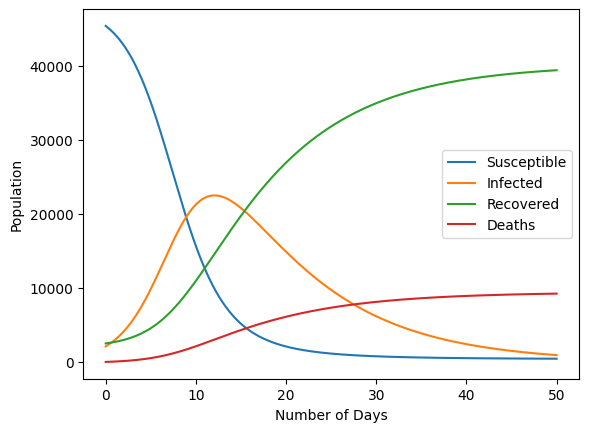

In [38]:
def SIR(trans_rate, rec_days, s_start, i_start, r_start, d_start, time):
    #Initializations
    t_initial, t_final = 0, time #start and end number of days
    t = t_initial #current day
    s, i, r, d = s_start, i_start, r_start, d_start #initial proportions for susceptible, infected, recovered, and death
    num_steps = t_final * 10 #10 steps for each day.
    a, b = trans_rate, rec_days #a (transmission coefficient/chance of infection) and b (recovery coefficient/days to recover).
    delta_t = (t_final - t_initial) / num_steps #time delta.

    #initialize lists for x and y axis to plot for SIRD.
    x_axis = [t]
    s_y_axis = [s] 
    i_y_axis = [i]
    r_y_axis = [r]
    d_y_axis = [d]

    #loop through SIR calculations 10 times for each day that we're plotting.
    for k in range(num_steps):
        #calculate rate of change for SIR per step.
        s_prime = -a * s * i 
        i_prime = a * s * i - i / b
        r_prime = (i / b) * .8 #80% recovered.
        d_prime = (i / b) * .2 #20% died.

        #calculate deltas for SIRD per step.
        delta_s = s_prime * delta_t
        delta_i = i_prime * delta_t
        delta_r = r_prime * delta_t 
        delta_d = d_prime * delta_t 

        #append deltas to x_axis(day) and y_axis for SIRD.
        x_axis.append(t + delta_t)
        s_y_axis.append(s + delta_s)
        i_y_axis.append(i + delta_i)
        r_y_axis.append(r + delta_r)
        d_y_axis.append(d + delta_d)

        #set new initial values for next iteration.
        t = t + delta_t
        s = s + delta_s
        i = i + delta_i
        r = r + delta_r
        d = d + delta_d

    fig, ax = plt.subplots()

    #plot SIRD with x_axis and y_axis for each.
    susceptible, = ax.plot(x_axis, s_y_axis, label = 'Susceptible')
    infected, = ax.plot(x_axis, i_y_axis, label = "Infected")
    recovered, = ax.plot(x_axis, r_y_axis, label = "Recovered")
    deaths, = ax.plot(x_axis, d_y_axis, label = "Deaths")

    #legend for SIRD.
    ax.legend(handles = [susceptible, infected, recovered, deaths])
    #x and y axes labels.

    ax.set_xlabel('Number of Days')
    ax.set_ylabel('Population')
    
    return

#calling SIR with initial values for question 1.
SIR(0.00001, 10, 45400, 2100, 2500, 0, 50)

I chose to keep it simple with this part of the assignment, and modified SIRPLOT to reflect a pandemic that resulted in death for 20% of the population that fell ill.  To accomplish this, I split the recovery population into two categories - those that recovered from the illness, and those that died.  The recovered population is multiplied by .8 and the death population is multiplied by .2, which will ultimately account for the entire population that falls ill.